In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_csv("data.csv")
data.head(3)

C:\Users\Owner\AppData\Local\Temp\ipykernel_40600\2434425709.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv")


,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,17.080000,...,None,None,0.92,102.09,159.3,[56.79999924 55.40000153 47.40000153],[[2896.]],2006-07-23 15:59:00.960000,earthquake_local,109C.TA_20060723155859_EV
1,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.5,16.879999,...,None,None,0.91,101.34,281.7,[65. 65.5 61.40000153],[[5508.]],2006-11-03 15:56:53.610000,earthquake_local,109C.TA_20061103155652_EV
2,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.5,17.260000,...,None,None,0.92,101.87,280.5,[37.20000076 42. 38.59999847],[[3114.]],2006-11-03 16:12:24.700000,earthquake_local,109C.TA_20061103161223_EV


In [3]:
data.dtypes

network_code                         object
receiver_code                        object
receiver_type                        object
receiver_latitude                   float64
receiver_longitude                  float64
receiver_elevation_m                float64
p_arrival_sample                    float64
p_status                             object
p_weight                            float64
p_travel_sec                        float64
s_arrival_sample                    float64
s_status                             object
s_weight                            float64
source_id                            object
source_origin_time                   object
source_origin_uncertainty_sec        object
source_latitude                     float64
source_longitude                    float64
source_error_sec                     object
source_gap_deg                       object
source_horizontal_uncertainty_km     object
source_depth_km                      object
source_depth_uncertainty_km     

data analytics start

In [4]:
data.shape

(200000, 35)

In [5]:
data.describe()

,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_latitude,source_longitude,source_magnitude,source_distance_deg,source_distance_km,back_azimuth_deg
count,200000.000000,200000.000000,200000.000000,200000.000000,199937.000000,200000.000000,200000.000000,199943.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,33.734235,-112.090444,1103.642794,661.487463,0.681587,7.387482,1204.963810,0.617248,33.714834,-112.803658,1.328498,0.370168,41.153621,196.981775
std,11.099382,43.044915,540.861686,181.186588,0.183430,5.682846,474.465309,0.213330,11.079471,41.098881,0.848106,0.334725,37.184304,96.340051
min,-33.204700,-174.197500,0.000000,22.000000,0.000000,0.000000,190.000000,0.000000,-33.313400,-179.996500,-0.100000,0.000000,0.000000,0.000000
25%,33.598182,-120.424800,775.400000,500.000000,0.590000,3.420000,900.000000,0.560000,33.468670,-120.452168,0.710000,0.144300,16.050000,129.900000
50%,33.611570,-116.596005,1271.000000,698.000000,0.630000,5.670000,1113.000000,0.590000,33.662332,-116.745833,1.120000,0.279900,31.110000,186.100000
75%,35.831000,-116.456370,1392.000000,800.000000,0.880000,9.560000,1392.000000,0.770000,35.751000,-116.453333,1.750000,0.495625,55.080000,290.800000
max,65.616000,179.300000,2894.000000,2261.000000,1.000000,55.910000,5644.000000,1.000000,67.271100,179.996000,6.500000,3.000000,334.150000,360.000000


<AxesSubplot:title={'center':'Unique values'}>

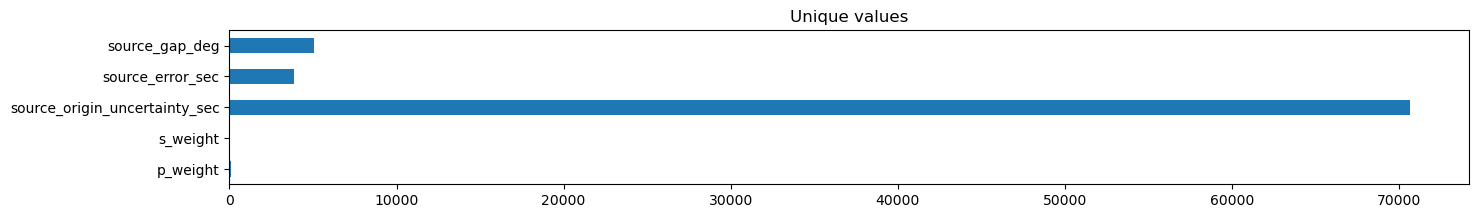

In [6]:
# Missing values
null_value_col = data.columns[data.isna().any()]
null_value = data[null_value_col].isnull().sum()
null_value.plot(kind='barh', figsize=(16, 2), title='Unique values')

In [7]:
data[null_value_col].dtypes

p_weight                         float64
s_weight                         float64
source_origin_uncertainty_sec     object
source_error_sec                  object
source_gap_deg                    object
dtype: object

In [8]:
# Handle float values
def handle_float_missing_value():
    print('aa')

In [9]:
# seperate columns based on dtypes
int_data = data.select_dtypes(include='int').columns.tolist()
float_data = data.select_dtypes(include='float64').columns.tolist()
object_data = data.select_dtypes(include='object').columns.tolist()

print("Int value column: ", int_data)
print("")
print("Float value column: ", float_data)
print("")
print("Object value column: ", object_data)
print("")

Int value column:  []

Float value column:  ['receiver_latitude', 'receiver_longitude', 'receiver_elevation_m', 'p_arrival_sample', 'p_weight', 'p_travel_sec', 's_arrival_sample', 's_weight', 'source_latitude', 'source_longitude', 'source_magnitude', 'source_distance_deg', 'source_distance_km', 'back_azimuth_deg']

Object value column:  ['network_code', 'receiver_code', 'receiver_type', 'p_status', 's_status', 'source_id', 'source_origin_time', 'source_origin_uncertainty_sec', 'source_error_sec', 'source_gap_deg', 'source_horizontal_uncertainty_km', 'source_depth_km', 'source_depth_uncertainty_km', 'source_magnitude_type', 'source_magnitude_author', 'source_mechanism_strike_dip_rake', 'snr_db', 'coda_end_sample', 'trace_start_time', 'trace_category', 'trace_name']



In [10]:
# Check duplicate values into data
dup_value = data.duplicated(keep='last').sum()
print("Total duplicate values in dataset: ", dup_value)

Total duplicate values in dataset:  0


In [13]:
data['source_origin_uncertainty_sec']

0         0.47
1         0.24
2         0.27
3         0.25
4         0.67
          ... 
199995     NaN
199996     NaN
199997     NaN
199998     NaN
199999     NaN
Name: source_origin_uncertainty_sec, Length: 200000, dtype: object